Mengambil Dataset dari Github

In [1]:
!git clone https://github.com/Dilalovegood/dataset.git

Cloning into 'dataset'...
remote: Enumerating objects: 619, done.
remote: Counting objects: 100% (619/619), done.
remote: Compressing objects: 100% (613/613), done.
remote: Total 619 (delta 3), reused 619 (delta 3), pack-reused 0
Receiving objects: 100% (619/619), 22.10 MiB | 21.09 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
    #The Stensorflow_version magic only works in colab.
    %tensorflow_version 2.x
except Exception:
    pass
    import numpy as np
    import math, os, sys
    import itertools

    import matplotlib.pyplot as plt
    plt.style.use('default')
    from scipy import ndimage

    from skimage import measure, morphology
    from skimage.io import imsave, imread
    from skimage.filters import threshold_otsu
    from skimage.transform import resize

    import tensorflow as tf
    from sklearn import svm, datasets
    from sklearn.metrics import confusion_matrix
    import pandas as pd

    !pip install scikit-image
    from skimage.io import imread
    from skimage.transform import resize

    !pip install tensorflow
    import tensorflow as tf



Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


Mengimpor Dataset


In [3]:
#Perintah di bawah ini untuk melihat list bagian dari file yang sudah diunduh dari Github

!ls dataset/image
!ls dataset/image/train
#!ls dataset/image/train/acne
!ls dataset/image/train/dry
!ls dataset/image/train/normal
!ls dataset/image/train/oily

test  train
dry  normal  oily
ls: cannot access 'dataset/image/train/acne': No such file or directory
dry10.jpg
dry10_jpg.rf.2cd6e192d2ec68f45484907da467b661.jpg
dry10_jpg.rf.7e28090781cc619a4d0b1583f0fb2ae4.jpg
dry10_jpg.rf.cee743c4d34635bc8ec127ea86fe09ee.jpg
dry11.jpg
dry11_jpg.rf.179bc778d7871dcdea427bd3a6643afa.jpg
dry11_jpg.rf.54ee1fc7f193638cdacc4cccfb747042.jpg
dry11_jpg.rf.c9be194ed824c02f4ce933c8d62e70f4.jpg
dry12.jpg
dry12_jpg.rf.41b68a8e2622e2b4762361995a0710b0.jpg
dry12_jpg.rf.e50924abbbc0b870f6822eb0b18e8dda.jpg
dry12_jpg.rf.e8ff3e95b0146a068a71bf08853c8f74.jpg
dry13.jpg
dry13_jpg.rf.2d1c0d5559cdb3ba21d8688ee5ad59cc.jpg
dry13_jpg.rf.d5922723cb375a85b8ca4f5998a14cce.jpg
dry13_jpg.rf.fd502e54f4223df386f031e39474236d.jpg
dry14.jpg
dry14_jpg.rf.3c34a7aab583ff2ad2c61799f29d3660.jpg
dry14_jpg.rf.7671149d419d9e92467e87081ac388ec.jpg
dry14_jpg.rf.9d4e39c905fce50fdd04f9bb4216e84d.jpg
dry15.jpg
dry16.jpg
dry17.jpg
dry18.jpg
dry18_jpg.rf.1a693c266f6c9fd8cca8cba6d6074b85.jpg
dry18_jp

<ipython-input-4-e3f6fa9ad3c0>:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread("dataset/image/train/oily/oily41.jpg")


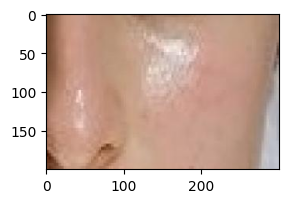

In [4]:
import imageio
import matplotlib.pyplot as plt

#Perintah untuk memvisualisasikan satu gambar dari data train
image = imageio.imread("dataset/image/train/oily/oily41.jpg")
plt.figure(figsize=(3,3))
plt.imshow(image)

In [5]:
#Memuat semua gambar ke memori untuk pertama kali
#Memuat dataset pelatihan
import os
import numpy as np
import tensorflow as tf
from skimage.transform import resize

IMAGE_SIZE = 224
BATCH_SIZE = 128
base_dir = os.path.join('dataset/image/train')

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
    subset='training')

val_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
    subset ='validation')

#Memuat dataset pengujian

X_test = []
y_test = []
#labels = ['acne', 'dry', 'normal', 'oily']
'''
for i, label in enumerate(labels):
    folder = os.path.join("dataset/image/test", label)
    files = sorted(os.listdir(folder))
    files = [x for x in files if x.endswith(".jpg")]
    for k,file in enumerate(files):
        image_path = os.path.join(folder, file)

        image = imread(image_path)/255.
        image = resize(image, (224, 224, 3))
        X_test.append(image)

        category = os.path.split(folder)[-1]
        y_test.append(i)

X_test = np.array(X_test)
y_test = np.array(y_test)

'''


for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)
    if not os.path.isdir(folder_path):
        continue

    for image_file in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_file)

        image = tf.keras.preprocessing.image.load_img(image_path)
        image = tf.keras.preprocessing.image.img_to_array(image) / 255.
        image = tf.image.resize(image, (224, 224))  # Menggunakan tf.image.resize
        X_test.append(image)

        category = os.path.split(folder)[-1]
        y_test.append(category)

X_test = np.array(X_test)
y_test = np.array(y_test)

#Menampilkan bentuk dari masing-masing dataset
for image_batch, label_batch in train_generator:
    break
print("Bentuk array dari dataset train (pelatihan) adalah:", image_batch.shape, label_batch.shape)

for image_batch, label_batch in val_generator:
    break

print("Bentuk array dari dataset validation (validasi) adalah:", image_batch.shape, label_batch.shape)
print("Bentuk array dari dataset test (pengujian) adalah:", X_test.shape, y_test.shape)

Found 336 images belonging to 3 classes.
Found 84 images belonging to 3 classes.
Bentuk array dari dataset train (pelatihan) adalah: (128, 224, 224, 3) (128, 3)
Bentuk array dari dataset validation (validasi) adalah: (84, 224, 224, 3) (84, 3)
Bentuk array dari dataset test (pengujian) adalah: (420, 224, 224, 3) (420,)


Menyimpan Label


In [6]:
print (train_generator.class_indices)

labels_txt= '\n'.join(sorted (train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
    f.write(labels_txt)

{'dry': 0, 'normal': 1, 'oily': 2}


Membuat Model dari Jaringan CNN yang Sudah dipelajari Sebelumnya (pre- trained convnets)

In [7]:
IMG_SHAPE = (224, 224, 3)
#Membuat nodel dasar (base model) dari pre-trained model Mobilefiet
base_model = tf.keras.applications.MobileNet(input_shape=IMG_SHAPE,
                                             include_top = False,
                                             weights = 'imagenet')

17225924/17225924 [==============================] - 0s 0us/step


In [8]:
base_model.trainable = False
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

Mengelompokan 4 jenis kulit wajah dengan deep learning

In [9]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras import layers
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split


Mempersiapkan Data Masukkan Pengujian


In [10]:
from tensorflow.keras.utils import to_categorical

# Definisikan kamus untuk mengonversi label-string ke angka
label_to_index = {'acne': 0, 'dry': 1, 'normal': 2, 'oily': 3}

# Konversi label-string di y_test ke angka menggunakan kamus
y_test_numeric = [label_to_index[label] for label in y_test]

# Konversi y_test_numeric menjadi format one-hot encoding
y_test2 = to_categorical(y_test_numeric)

# Memastikan X_test dan y_test2 memiliki format yang benar
X_test3, y_test3 = X_test, y_test2

# Menampilkan hasil untuk verifikasi
print("y_test2 (one-hot encoded labels):\n", y_test2[:10])
print("X_test3 shape:", X_test3.shape)
print("y_test3 shape:", y_test3.shape)


y_test2 (one-hot encoded labels):
 [[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]
X_test3 shape: (420, 224, 224, 3)
y_test3 shape: (420, 4)


Pembuatan Model (Menambah Model)

In [11]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Conv2D(32, 4, activation='relu'),
    #tf.keras.layers. Dropout (0.2),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers. Dense(4, activation ='softmax')
    ])

model.compile("adam", loss="categorical_crossentropy", metrics = ["acc"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, 7, 7, 1024)        3228864   
 onal)                                                           
                                                                 
 conv2d (Conv2D)             (None, 4, 4, 32)          524320    
                                                                 
 global_average_pooling2d (  (None, 32)                0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 4)                 132       
                                                                 
Total params: 3753316 (14.32 MB)
Trainable params: 524452 (2.00 MB)
Non-trainable params: 3228864 (12.32 MB)
_________________________________________________________________


Pelatihan

In [13]:
#from keras.callbacks leport EarlyStopping, ModelCheckpoint
#Menyimpan file model bobot yang terbaik selana pelatihan (dalam format keras "h5")
#ckpt RodelCheckpoint("klasifikasi Beras Tumpukan.h5", monitor-'val loss, verbose-1, save best_only-True, save

history = model.fit_generator(train_generator,
                            epochs=50,
                            validation_data=val_generator)

#history model.fit(xX traini, yy trains, batch_size-120, epochs 100, validation data-(X_valid),y_valid3),cal

<ipython-input-13-19e8144b01ce>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/50


InvalidArgumentError: Graph execution error:

Detected at node categorical_crossentropy/softmax_cross_entropy_with_logits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 377, in dispatch_queue

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 250, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 748, in __init__

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-12-19e8144b01ce>", line 5, in <cell line: 5>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2913, in fit_generator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5579, in categorical_crossentropy

logits and labels must be broadcastable: logits_size=[80,4] labels_size=[80,3]
	 [[{{node categorical_crossentropy/softmax_cross_entropy_with_logits}}]] [Op:__inference_train_function_7512]

Menggambarkan Hasil Pelatihan


In [ ]:
plt.plot(history.history["acc"], label="Akurasi Pelatihan")
plt.plot(history.history["val_acc"], label = "Validasi Akurasi")
plt.legend()
plt.show()

plt.plot(history.history["loss"], label="Kesalahan Pelatihan")
plt.plot(history.history["val_loss"], label="Validasi Kesalahan")
plt.legend()
plt.show()

In [ ]:
print('Number of trainable variables = {}'.format(len(model.trainable_variables)))

Menggunakan Model


In [ ]:
print(train_generator)

In [ ]:
#Prediksi Label Validasi dengan Pelatihan

n = 44
input_image = image_batch[n][np.newaxis,...]
print("Labelnya adalah: ", label_batch[n])

predictions = model.predict(input_image)
print("Prediksinya adalah", predictions[0])

Evaluasi


In [ ]:
#Memeriksa matriks model
print(model.metrics_names)
#Evaluasi data test
print(model.evaluate(x= X_test3, y = y_test3))

In [ ]:
#Menampilkan matriks yang benar dan matriks hasil prediksi
#Label yang benar

y_true = np.argmax(y_test2,axis=1)

#Label prediksi
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print(y_true)
print(y_pred)

Prediksi Gambar Individual


In [ ]:
n = 50 #Jangan melampaui (nilai dari gambar test 1)
labels = ['acne', 'dry', 'normal', 'oily']

plt.imshow(X_test[n])
plt.show()

true_label = np.argmax(y_test2, axis=1) [n]
print("Label yang benar adalah:", true_label,":", labels[true_label])
prediction = model.predict(X_test[n][ np.newaxis,...]) [0]
print("Nilai yang diprediksi adalah:", prediction)
predicted_label = np.argmax(prediction)
print("Label yang diprediksi adalah:", predicted_label,":", labels[predicted_label])

if true_label == predicted_label:
    print("Prediksi benar")

else:
    print("Prediksi salah")

if predicted_label == 0:  # Jika jenis kulit adalah acne
    recommendation = "Rekomendasi: Gunakan produk dengan kandungan salicylic acid, sulfur, mandelic acid untuk mengeringkan jerawat, dan juga mengontrol sebum di kulit wajah."
elif predicted_label == 1:  # Jika jenis kulit adalah dry
    recommendation = "Rekomendasi: Untuk kulit kering, pilihlah kandungan Hyaluronic Acid, vitamin E, essencial acid yang bermanfaat untuk membantu melembabkan kulit."
elif predicted_label == 2:  # Jika jenis kulit adalah normal
    recommendation = "Rekomendasi: Untuk kulit normal, kandungan Phyto-Retinol dan Hyaluronic Acid sangat bagus untuk mencegah penuaan, hidrasi, dan menjaga kulit tetap bercahaya."
elif predicted_label == 3:  # Jika jenis kulit adalah oily
    recommendation = "Rekomendasi: Gunakan skincare yang, mengandung kaolin clay,beta hydroxy acid (BHA), Asam Salisilat dan  Tea Tree Oil untuk membantu mengurangi minyak berlebih pada wajah."
else:
    recommendation = "Rekomendasi tidak tersedia untuk jenis kulit ini."

# Menampilkan rekomendasi skincare
print(recommendation)


Confusion Matrix


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)

    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Label Benar',
           xlabel='Label Prediksi')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# Assuming y_true and y_pred are already defined
# and labels is a list of class names

np.set_printoptions(precision=2)
plot_confusion_matrix(y_true, y_pred, classes=np.array(labels), normalize=True,
                      title='Normalized confusion matrix')

# Print classification report
print(classification_report(y_true, y_pred, target_names=labels))


Menyimpan dan Konversi ke ".tflite"


In [ ]:
saved_model_dir ='save/model'
tf.saved_model.save(model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

with open('Klasifikasi_Jenis_Kulit_Wajah_MobileNet_Baru.tflite', 'wb') as f:
    f.write(tflite_model)